# Visualization: Indian Weather Insights

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "data.db"

def sql(query, params=None):
    con = sqlite3.connect(DB_PATH)
    df = pd.read_sql_query(query, con, params=params or [])
    con.close()
    return df

print("Connected to", DB_PATH)

Connected to data.db


## 1) Top 10 most humid cities on average

,location_name,avg_humidity
0,Meghraj,97.96
1,Modasa,97.96
2,Devgadh Bariya,97.58
3,Godhra,97.58
4,Lunavada,97.58
5,Morwa,97.58
6,Dungarpur,97.54
7,Salumbar,97.54
8,Chhota Udepur,97.50
9,Dohad,97.50


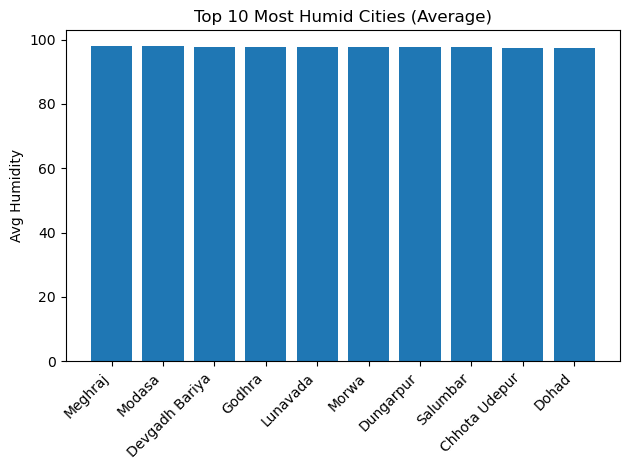

In [13]:
df = sql("""
    SELECT location_name, ROUND(AVG(avg_humidity),2) AS avg_humidity
    FROM daily_weather
    GROUP BY location_name
    ORDER BY avg_humidity DESC
    LIMIT 10
""")
display(df)
plt.figure()
plt.bar(df['location_name'], df['avg_humidity'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Humid Cities (Average)")
plt.ylabel("Avg Humidity")
plt.tight_layout()
plt.show()

## 2) Delhi’s temperature trend over the last 7 days

,date,max_temp,min_temp
0,2025-09-06,18.9,9.2


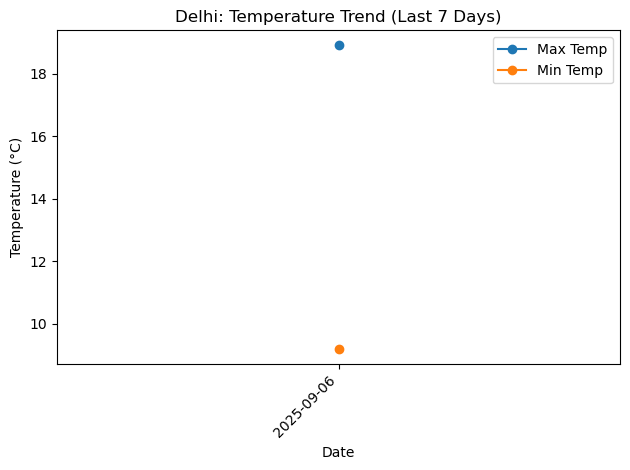

In [14]:
df = sql("""
    SELECT date, max_temp, min_temp
    FROM daily_weather
    WHERE location_name LIKE 'Delhi%'
    ORDER BY date DESC
    LIMIT 7
""")
df = df.sort_values('date')
display(df)
plt.figure()
plt.plot(df['date'], df['max_temp'], marker='o', label='Max Temp')
plt.plot(df['date'], df['min_temp'], marker='o', label='Min Temp')
plt.title("Delhi: Temperature Trend (Last 7 Days)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3) Most common weather conditions across all cities

,condition,cnt
0,Partly cloudy,17559
1,Patchy rain possible,16750
2,Light rain shower,7584
3,Clear,5583
4,Sunny,4203
5,Cloudy,2952
6,Mist,2016
7,Overcast,1442
8,Thundery outbreaks possible,1022
9,Patchy light drizzle,791


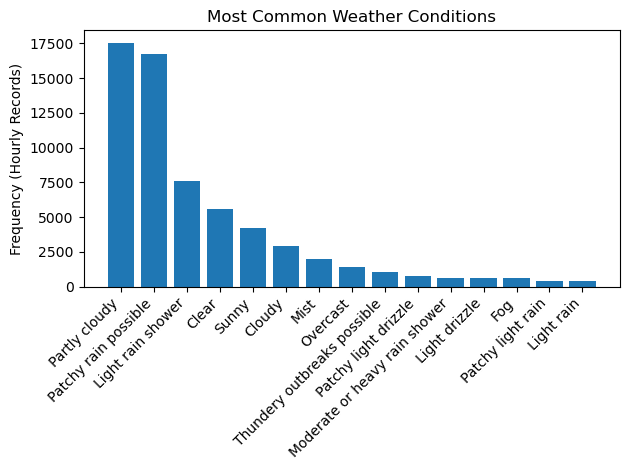

In [15]:
df = sql("""
    SELECT condition, COUNT(*) AS cnt
    FROM weather
    WHERE condition IS NOT NULL AND condition <> ''
    GROUP BY condition
    ORDER BY cnt DESC
    LIMIT 15
""")
display(df)
plt.figure()
plt.bar(df['condition'], df['cnt'])
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Weather Conditions")
plt.ylabel("Frequency (Hourly Records)")
plt.tight_layout()
plt.show()

## 4) Avg Max Temperature in Major Indian Metros

,location_name,avg_max_temp
0,Kolkata,33.1
1,Chennai,32.8
2,Hyderabad,29.0
3,Bengaluru,27.2
4,Mumbai,26.0
5,Ahmedabad,24.9
6,Pune,24.5
7,Delhi,18.9


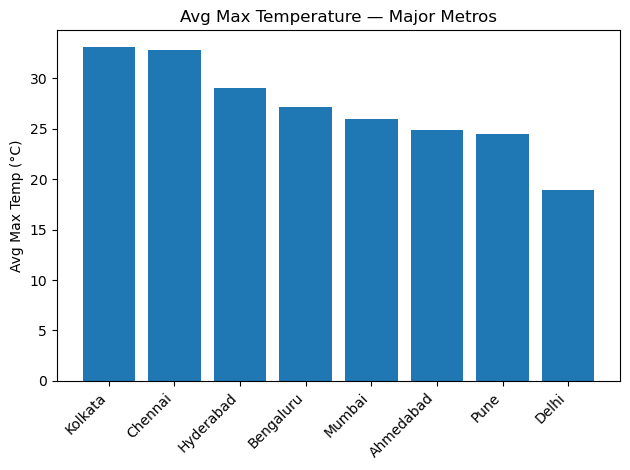

In [16]:
metros = ('Delhi','Mumbai','Kolkata','Chennai','Bengaluru','Hyderabad','Pune','Ahmedabad')
placeholders = ",".join("?"*len(metros))
df = sql(f"""
    SELECT location_name, ROUND(AVG(max_temp),2) AS avg_max_temp
    FROM daily_weather
    WHERE location_name IN ({placeholders})
    GROUP BY location_name
    ORDER BY avg_max_temp DESC
""", metros)
display(df)
plt.figure()
plt.bar(df['location_name'], df['avg_max_temp'])
plt.xticks(rotation=45, ha='right')
plt.title("Avg Max Temperature — Major Metros")
plt.ylabel("Avg Max Temp (°C)")
plt.tight_layout()
plt.show()

## Try these yourself

- **Bhopal last 5 days**: Plot a line of `max_temp` over the last 5 dates.
- **Compare average humidity last week (4 cities)**: Bar chart across chosen cities.
- **Jaipur day vs night (3 days)**: Line chart with both max & min temps.
- **Chennai condition distribution (this month)**: Pie chart of condition frequencies.